TP 1 : Régression linéaire / polynomiale
======

# 0 - Introduction

L'objectif de ce premier TP est de se familiariser avec des outils d'apprentissage statistique. Nous les appliquerons à la régression linéaire et logistique.

Il sera à réaliser en python 3. Les librairies utilisées sont installées sur les machines de l'université et de l'Ensicaen, vous pouvez néanmoins les installer sur vos propres machines à l'aide de l'utilitaire pip présent par défaut avec python.
	
N'hésitez pas à regarder régulièrement la documentation de ces librairies, des exemples d'utilisation accompagnent généralement l'explication de chaque fonction.


Langage utilisé:
- Python 3: https://docs.python.org/3/

Librairie de math:
- Numpy: https://docs.scipy.org/doc/numpy/reference/
- Scipy: https://docs.scipy.org/doc/scipy/reference/

Librairie d'affichage de données:
- Matplotilb: https://matplotlib.org/contents.html

Librairie de traitement d'image:
- Scikit-image: https://scikit-image.org/

Librairie d'apprentissage automatique:
- Scikit-learn: http://scikit-learn.org

**Afin d'avoir un code optimisé, vous éviterez d'utiliser les instructions python3 `if`, `for` et `while` (sauf mention contraire dans le sujet).**

In [2]:
#Ce bloc contient tous les imports nécessaires pour ce TP.

# import outils mathématique
import numpy as np
from numpy.linalg import inv

# import fonction d'affichage
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D # pour la gestion de figure 3D
import matplotlib.patches as mpatches

# import librairies d'apprentissage automatique
import sklearn as skl
import sklearn.datasets as data
import sklearn.linear_model

# Divers 
from IPython.display import display, Markdown

# 1 - Outils de base  <a id="title1"></a>
## 1.1 - Introduction aux  notebook Jupyter <a id="title1.1"></a>

Le code est à écrire en `python 3` à la suite des questions dans ce fichier. Vous appuierez soit sur le bouton *run cell*, soit sur les touches *Ctrl-Entrée* (ou *Shift-Entrée*), à l’intérieur de la zone de saisie, pour lancer l'exécution de vos commandes. Si la commande est en cours d’exécution une étoile apparaît à côté de la zone de saisie de la commande : In [\*]. Une fois le calcul achevé, l'étoile est remplacée par le numéro du "run" permettant de retrouver, par la suite, l'ordre de lancement de chaque bloc.

Commencez par importer les librairies nécessaires au TP, en exécutant le premier bloc du TP. Lancez ensuite le bloc ci-dessous. Vous devez obtenir les numéros de version des librairies installé sur votre machine.

In [3]:
print('Version de numpy:',np.__version__)
print('Version de matplotlib:',matplotlib.__version__)

Version de numpy: 1.17.4
Version de matplotlib: 3.1.2


Exécutez la ligne suivante en vous plaçant dans la cellule et en appuyant sur *Ctrl+Entrée*.

In [4]:
a = 1 
print(a)

1


Lancez la ligne suivante plusieurs fois. L'ordre d'exécution des blocs est important dans un notebook jupyter. Constatez les changements d'affichage produit.

In [5]:
a += 1 
print(a)

2


Relancez le premier bloc définissant la variable `a=1` puis lancez le bloc suivant (remarquez bien les valeurs après `In [` ):

In [6]:
print(a)

2


Vous pouvez utiliser l'aide à la complétion avec la touche `tab`. Testez avec la fonction `np.random.randn`.

In [7]:
a = np.random.randn()
print(a)

-0.12084400479364552


Vous pouvez accéder à une documentation simplifiée de la fonction avec `Shit+tab`. Pour plus d'information, cliquez sur le +. Il est possible d'accéder directement à la documentation détaillée en ajoutant `?` à la fin de la commande.
Testez avec la fonction `np.random.randn`.

In [8]:
a = np.random.randn()
print(a)

-1.272859703517593


Pour aller plus loin: https://jupyter-notebook.readthedocs.io/en/stable/

## 1.2 - Introduction à la visualisation des données (Matplotlib)<a id="title1.2"></a>

Nous allons utiliser dans ce TP la librairie de visualisation `Matplotlib`. L'usage de cette librairie est simplifié dans les notebook jupyter. Je donnerai dans ce TP l'usage standard de la librairie, certaines instructions données pourront être facultatives dans un notebook mais serait indispensable dans un interpréteur python classique.

`Matplotlib` permet de construire une figure à visualiser. La création d'une figure ce fait à l'aide de l'instruction `plt.figure`. Toutes les instructions que l'on fait ensuite agissent sur la figure courante en mémoire mais ne sont pas directement visible. Afin de rendre effectivement visible la figure finale, on utilise l'instruction `plt.show`. Cette instruction est bloquante en python standard. 
Testez le code suivant affichant un `sinus` et un `cosinus`.

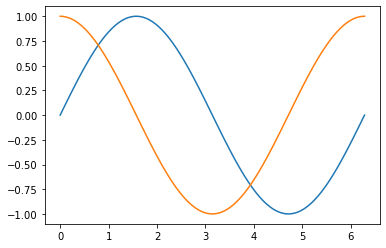

In [9]:
x = np.linspace(0,2*np.pi,100) # création de 100 points entre 0 et 2pi
plt.figure() # Création d'une figure
plt.plot(x,np.sin(x)) # Ajout du tracé d'un sinus composé de 100 points reliés par des droites entre 0 et 2pi
plt.plot(x,np.cos(x)) # Ajout du tracé d'un cosinus composé de 100 points reliés par des droites entre 0 et 2pi
plt.show() # Affichage de la figure créée.

Regardez le code suivant. Il permet de tracer la fonction sinus en rouge en mettant des carrés (square == s) aux points vraiment calculés et en les reliant par une droite. Le deuxième tracé est la fonction sinus en bleu, seuls les points calculés sont tracés à l'aide d'étoile.

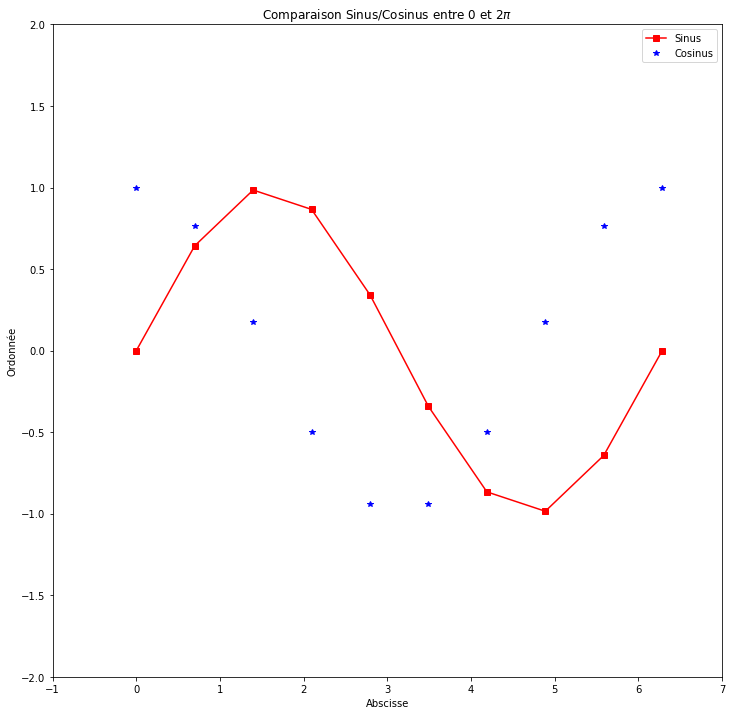

In [10]:
x = np.linspace(0,2*np.pi,10)

plt.figure(figsize=(12,12)) # définition d'une figure en précisant sa taille

# Courbes
plt.plot(x,np.sin(x),'rs-',label='Sinus')
plt.plot(x,np.cos(x),'b*',label='Cosinus')

# Titre et légende
plt.title('Comparaison Sinus/Cosinus entre 0 et $2\pi$')
plt.legend()

# Texte des axes
plt.xlabel('Abscisse')
plt.ylabel('Ordonnée')

# Définition des limites des axes
plt.xlim([-1,7])
plt.ylim([-2,2])

plt.show() # Affichage de la figure créée.

Attention l'ordre des points est important si on souhaite les relier:

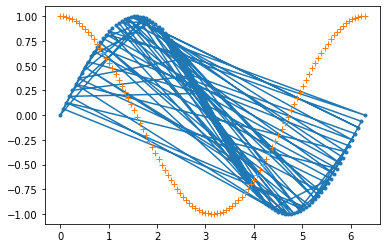

In [11]:
x = np.linspace(0,2*np.pi,100)
np.random.shuffle(x)
plt.figure()
plt.plot(x,np.sin(x),'.-')
plt.plot(x,np.cos(x),'+')
plt.show()

Faites une figure affichant à la fois la fonction sinus cardinal de $\dfrac{x}{\pi}$ (vous pouvez utiliser `np.sinc`) et l'inverse de x. Vous mettrez la fonction inverse en pointillé. Vous ajouterez également un titre et une légende.

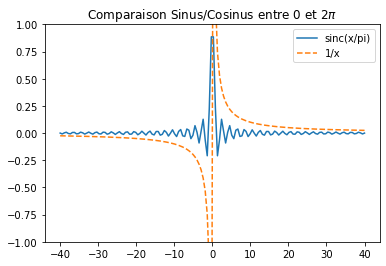

In [12]:
x = np.linspace(-40, 40, 150)
plt.figure()
plt.title('Comparaison Sinus/Cosinus entre 0 et $2\pi$')
plt.plot(x,np.sinc(x), label = 'sinc(x/pi)')
plt.plot(x,1/x,'--', label = '1/x')
plt.ylim([-1,1])
plt.legend()
plt.show()

La fonction `plt.scatter` permet d'afficher spécifiquement des points qui ne seront pas reliés. Elle permet notamment d'afficher des points de couleurs et tailles différentes.

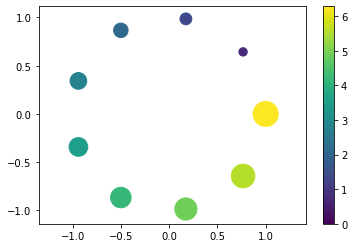

In [13]:
t = np.linspace(0,2*np.pi,10)
plt.figure()
plt.scatter(np.cos(t),np.sin(t),c=t,s=100*t)
plt.axis('equal') # pour avoir des axes avec les mêmes proportions.
plt.colorbar() # Échelle des valeurs associées aux couleurs 

plt.show()

La fonction `plt.imshow` permet d'afficher un tableau comme une image. Les valeurs doivent être soit entières entre 0 et 255 soit flottantes entre 0. et 1. .

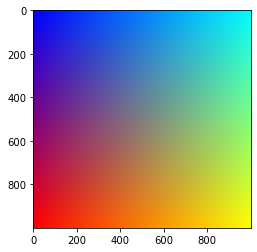

In [14]:
n=int(1e3)
x = np.linspace(0,1,n)
degradee = np.tile(x[:,np.newaxis],n)
im = np.stack((degradee,degradee.T,1-degradee),axis=2)

plt.figure()
plt.imshow(im)
plt.show()

Si le tableau est une matrice, l'image sera affichée en fausse couleurs correspondant à la carte de couleur paramétrée. Pour avoir une image en noir et blanc, il faudra préciser `cmap='gray'`.

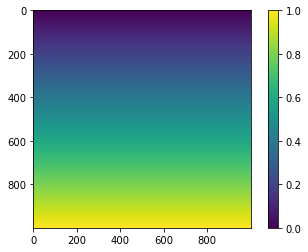

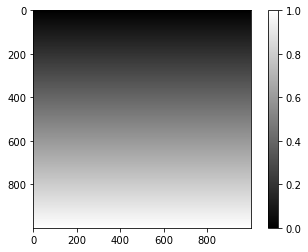

In [15]:
plt.figure()
plt.imshow(degradee)
plt.colorbar()

plt.figure()
plt.imshow(degradee,cmap='gray')
plt.colorbar()

plt.show()

Il est possible d'afficher des points en 3D. Pour cela il faut définir une figure avec une projection 3D. Il est ensuite possible d'utiliser les fonctions précédemment vues comme `plt.scatter`.

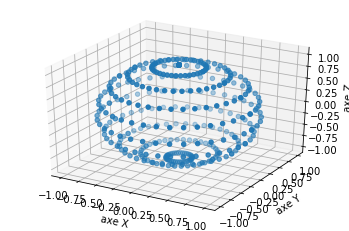

In [16]:
t = np.linspace(0,2*np.pi,20)
t = np.stack(np.meshgrid(t,t),axis=2).reshape((-1,2))

ax = plt.figure().add_subplot(projection='3d') # définition d'une figure 3D

ax.scatter(np.cos(t[:,1])*np.sin(t[:,0]), # abscisse
           np.sin(t[:,1])*np.sin(t[:,0]), # ordonnée
           np.cos(t[:,0]) # profondeur
          )
ax.set_xlabel('axe X')
ax.set_ylabel('axe Y')
ax.set_zlabel('axe Z')
plt.show()

Il est possible de faire des figures avec des sous-figures en utilisant `plt.subplots`.

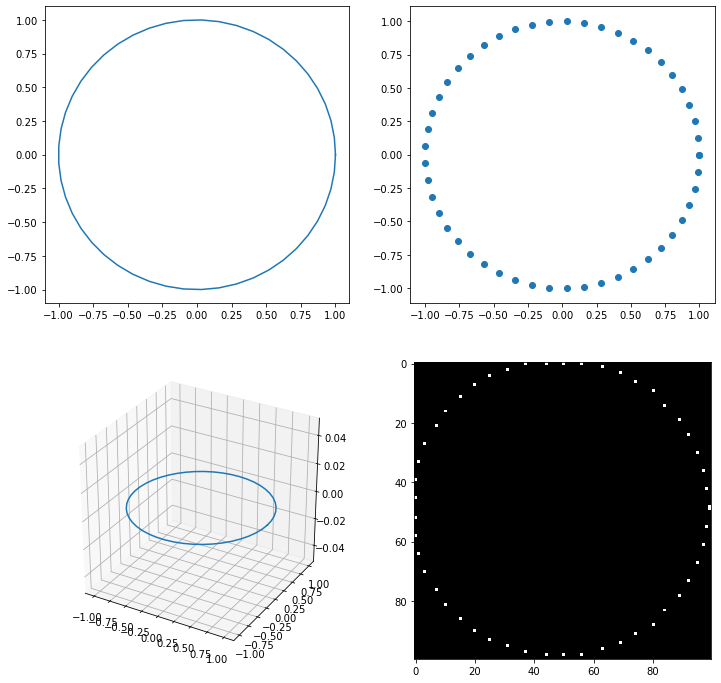

In [17]:
x = np.linspace(0,2*np.pi,int(5e1))
fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(2, 2, 1)
ax.plot(np.cos(x),np.sin(x))

ax = fig.add_subplot(2, 2, 2)
ax.scatter(np.cos(x),np.sin(x))

ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.plot(np.cos(x),np.sin(x))

ax = fig.add_subplot(2, 2, 4)
im = np.zeros((100,100))
im[(49+np.cos(x)*50).astype('int'),(49+np.sin(x)*50).astype('int')]=1
ax.imshow(im.T,cmap='gray')

plt.show()

## 1.3 Le calcul matriciel

Cette partie a pour but de reprendre rapidement les bases de numpy et notamment les éléments du tutoriel https://numpy.org/doc/stable/user/quickstart.html . N'hésitez pas à lire ce tutoriel pour avoir une maitrise des notions abordées.

### 1.3.1 Les créations de tableaux numpy

`Numpy` offre plusieurs outils de création de tableau que vous pouvez retrouver à l'adresse suivante: https://numpy.org/doc/stable/reference/routines.array-creation.html . Étudiez plus particulièrement les fonctions : 
- [np.ones](https://numpy.org/doc/stable/reference/generated/numpy.ones.html#numpy.ones),
- [np.zeros](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html#numpy.zeros), 
- [np.array](https://numpy.org/doc/stable/reference/generated/numpy.array.html#numpy.array), 
- [np.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html#numpy.linspace), 
- [np.arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html#numpy.arange).

En utilisant la fonction appropriée de `numpy`, créez un vecteur contenant 5 fois la valeur un que vous nommerez `v1`.  

In [18]:
v1 = np.ones(5)
print("v1 =", v1)

v1 = [1. 1. 1. 1. 1.]


En utilisant la fonction appropriée de `numpy`, créez un vecteur contenant les valeurs 9,10,11 que vous nommerez `v2`.  

In [19]:
v2 = np.array([9,10,11])
print("v2 =", v2)

v2 = [ 9 10 11]


En utilisant la fonction appropriée de `numpy`, créez une matrice contenant les valeurs 1,2,3 sur la première ligne et 4,5,6 sur la seconde. Vous la nommerez `M1`.  

In [20]:
M1 = np.array([[1,2,3],[4,5,6]])
print("M1 = ",M1)

M1 =  [[1 2 3]
 [4 5 6]]


Écrivez une matrice `M2` de taille $10\times10$ contenant que des zéros. Vous vérifierez les dimensions de la matrice avec l'attribut `shape`.

In [21]:
M2 = np.zeros((10,10))
print("M2 = ",M2)
print("Dimension M2 : ", np.shape(M2))

M2 =  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Dimension M2 :  (10, 10)


Il est possible de générer des tableaux pseudo-aléatoires avec `numpy`: https://numpy.org/doc/stable/reference/random/legacy.html

En vous appuyant sur la documentation générez une matrice `M3` de taille 10 par 5 de valeurs aléatoires entre 0 et 1 selon une loi uniforme. 

In [22]:
M3 = np.array(np.random.uniform(0,1,10*5))
M3 = M3.reshape(10,5)
print ("M3 = ",M3)

M3 =  [[0.81500441 0.61108589 0.07201355 0.48014934 0.38925649]
 [0.7842052  0.91154157 0.04646896 0.95545671 0.99595588]
 [0.63324947 0.02930618 0.11434772 0.82738641 0.00306931]
 [0.15288493 0.6051023  0.292975   0.66511594 0.13884864]
 [0.49268317 0.19728175 0.00974912 0.43407444 0.35854723]
 [0.81345789 0.0361763  0.55862083 0.8537733  0.73208877]
 [0.55486641 0.65696552 0.05374138 0.90108692 0.14619931]
 [0.52380109 0.16842831 0.6090984  0.22826182 0.3292544 ]
 [0.37042731 0.73916384 0.33107389 0.38468737 0.04932303]
 [0.42552749 0.52345626 0.97963723 0.3453166  0.08232007]]


### 1.3.2 Les opérateurs mathématiques de base

Il est possible de faire des opérations termes à termes entre deux tableaux numpy par exemple avec `+ - / *`.

Testez les codes suivants:

In [23]:
print(2*v2)
print()
print(M1+M1)
print()
print(M3*M3)

[18 20 22]

[[ 2  4  6]
 [ 8 10 12]]

[[6.64232184e-01 3.73425965e-01 5.18595188e-03 2.30543393e-01
  1.51520617e-01]
 [6.14977788e-01 8.30908042e-01 2.15936404e-03 9.12897528e-01
  9.91928112e-01]
 [4.01004896e-01 8.58852040e-04 1.30754020e-02 6.84568269e-01
  9.42066335e-06]
 [2.33738004e-02 3.66148796e-01 8.58343525e-02 4.42379219e-01
  1.92789447e-02]
 [2.42736703e-01 3.89200883e-02 9.50453813e-05 1.88420621e-01
  1.28556115e-01]
 [6.61713735e-01 1.30872448e-03 3.12057231e-01 7.28928847e-01
  5.35953963e-01]
 [3.07876735e-01 4.31603696e-01 2.88813580e-03 8.11957646e-01
  2.13742374e-02]
 [2.74367577e-01 2.83680950e-02 3.71000867e-01 5.21034595e-02
  1.08408461e-01]
 [1.37216389e-01 5.46363186e-01 1.09609917e-01 1.47984376e-01
  2.43276142e-03]
 [1.81073647e-01 2.74006453e-01 9.59689112e-01 1.19243554e-01
  6.77659378e-03]]


Le produit matriciel se fait avec l'opérateur `dot` ou le symbole `@`. En vous référant à la documentation ( https://numpy.org/doc/stable/reference/generated/numpy.dot.html ), calculez le produit matriciel entre la matrice `M3` et le vecteur `v1`. 

In [24]:
np.dot(M3,v1)

array([2.36750969, 3.69362832, 1.60735909, 1.85492681, 1.49233571,
       2.99411708, 2.31285954, 1.85884402, 1.87467544, 2.35625765])

En vous référant à la documentation sur les opérateurs de manipulation de tableau ( https://numpy.org/doc/stable/reference/routines.array-manipulation.html ), que fait selon vous l'opération suivante:

`M1.T`


Quelle autre solution la documentation propose-t-elle pour réaliser cette opération ?

In [25]:
x = M1
y = M1.T

L'opérateur `inv` ( https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html ) permet l'inversion d'une matrice.
Expliquez ce que fait l'opération suivante:

`inv( M1 @ M1.T)`

In [26]:
print(inv(np.dot(M1,M1.T)))

[[ 1.42592593 -0.59259259]
 [-0.59259259  0.25925926]]


### 1.3.3 Les opérateurs de concaténation

`Numpy` offre plusieurs opérateurs de concaténation: https://numpy.org/doc/stable/reference/routines.array-manipulation.html#joining-arrays . 
Veuillez lire plus particulièrement les documentations des fonctions suivantes:

- [np.concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html#numpy.concatenate)
- [np.stack](https://numpy.org/doc/stable/reference/generated/numpy.stack.html#numpy.stack)
- [np.append](https://numpy.org/doc/stable/reference/generated/numpy.append.html#numpy.append)


En utilisant la fonction la plus appropriée, concaténez les matrices `M2` et `M3` selon l'axe des colonnes.

In [27]:
print('Dim M2 :',M2.shape)
print('Dim M3 :',M3.shape)
M4 = np.concatenate((M2,M3), axis=1).shape
print('Dim M2 et M3 concaténer selon les colonnes',M4)

Dim M2 : (10, 10)
Dim M3 : (10, 5)
Dim M2 et M3 concaténer selon les colonnes (10, 15)


Est-il possible de concaténer `M2` et `M3` selon l'axe des lignes ? Si oui comment, si non pourquoi ?   

En utilisant la fonction la plus appropriée, créez une matrice contenant sur la première ligne le vecteur `v2` et sur la deuxième ligne un vecteur de 1.

In [28]:
M = np.stack((v2,v1[2:]))
print(M)
#v1[2:] = tous les éléments à partir de l'indice 2(à partir du 3ème élément)

[[ 9. 10. 11.]
 [ 1.  1.  1.]]


En utilisant la fonction la plus appropriée, créez une matrice contenant sur la première colonne le vecteur `v2` et sur la deuxième colonne un vecteur de 1.

In [29]:
M.T
#Bon exemple pour comprendre la transposée

array([[ 9.,  1.],
       [10.,  1.],
       [11.,  1.]])

En utilisant la fonction la plus appropriée, créez un vecteur contenant d'abord 3 cases à 1 puis les valeurs du vecteur `v2`.

In [30]:
V = np.concatenate((v1[:3],v2))
print(V)
print(V.shape)
#On peut utiliser np.concatenate ou np.append

[ 1.  1.  1.  9. 10. 11.]
(6,)


### 1.3.4 Le broadcasting

Lisez attendivement les informations de la page https://numpy.org/doc/stable/user/basics.broadcasting.html . Ce mécanisme est très puissant et peut simplifier/optimiser grandement votre code.

- Créez un vecteur `x` de 100 valeurs entre $-2\pi$ et $2\pi$.
- Créez un vecteur $v_\text{cos}$ de 100 valeurs de cosinus entre $-2\pi$ et $2\pi$ et affichez ces valeurs.
- Créez un vecteur $v_\text{sin}$ de 100 valeurs de sinus  entre $-2\pi$ et $2\pi$ et affichez ces valeurs.
- En utilisez le broadcasting de numpy, créé une matrice $M$ dont les valeurs $M_{i,j}$ sont $\text{cos}(x_i) + \text{sin}(x_j)$ où $x_i$ est la $i^\text{ème}$ valeur de $v_\text{cos}$ et $x_j$ est la $j^\text{ème}$ valeur de $v_\text{sin}$.
- A l'aide de la fonction `plt.imshow` de `matplotlib` . Affichez cette matrice comme une image.

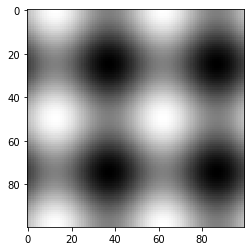

In [31]:
x = np.linspace(-2*np.pi,2*np.pi, 100)
Vcos = np.cos(x)
Vsin = np.sin(x)
plt.imshow(Vcos[:, np.newaxis] + Vsin[np.newaxis, :], cmap=plt.cm.gray)
#Broadcasting: Vcos[:, np.newaxis] + Vsin[np.newaxis, :]


Bonus: En considérant une image noir et blanc comme une surface 3D dont l'altitude correspond à l'intensité lumineuse, affichez la figure précédente en 3D.

(100, 100)


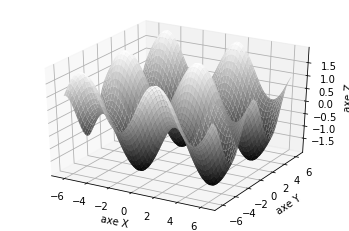

In [32]:
x = np.linspace(-2*np.pi,2*np.pi, 100)
Vcos = np.cos(x)
Vsin = np.sin(x)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y = np.meshgrid(x, x)
ax.plot_surface(x, y,Vcos[:, np.newaxis] + Vsin[np.newaxis, :], cmap=plt.cm.gray)
print(x.shape)
ax.set_xlabel('axe X')
ax.set_ylabel('axe Y')
ax.set_zlabel('axe Z')
plt.show()
#Image 3D de l'image précédente

# 2 - Régression linéaire

## 2.1 - Génération d'un problème de régression

La bibliothèque `scikit-learn` permet de générer un problème de régression et de le résoudre.
Vous pouvez par exemple générer un problème de régression linéaire à l'aide de la fonction `make_regression` ( https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html ).

Générez un problème de régression linéaire composé de 50 points avec:
- une dimension de descripteur,
- une dimension informative,
- une dimension cible,
- un bruit d'écart type 5,
- un biais de 50.

Affichez les points obtenus. Pour simplifier la suite vous stockerez les abscisses dans un vecteur `x` et les ordonnées dans un vecteur `y`. Vérifiez vos dimensions pour n'avoir qu'une dimension dans les deux cas.

Dimensions de x: (50, 1)
Dimensions de y: (50,)


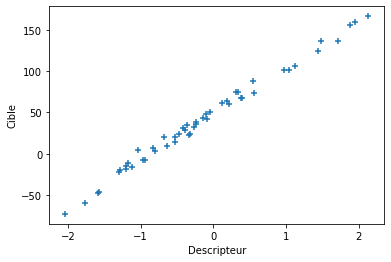

In [33]:
from sklearn.datasets import make_regression
x,y,coef = make_regression(n_samples=50, n_features=2, noise=5.0, bias=50.0, coef=True)

x = x[:,1].reshape(-1,1)

plt.scatter(x, y,marker='+')
plt.xlabel('Descripteur')
plt.ylabel('Cible')
plt.show

print("Dimensions de x:", x.shape)
print("Dimensions de y:", y.shape)




## 2.2 - Résolution analytique

En vous basant sur votre cours, qu'elle est la formule analytique permettant de résoudre ce problème de régression ? 

In [34]:
# Remplacez les ? par votre réponse
formule = '$$w_0 = ~y - w_1~x$$\
           $$w_1 = cov(x,y)/var(x)$$\
           $$y = w_0 + w_1 x$$'
display(Markdown(formule))

$$w_0 = ?$$           $$w_1 = ?$$

En utilisant la question précédente et les fonctions statistique de `numpy` ( https://numpy.org/doc/stable/reference/routines.statistics.htmlhttps://numpy.org/doc/stable/reference/routines.statistics.html ), donnez l'équation de la meilleure droite résolvant ce problème de régression.

covarience de x et y =  57.554915612767616
~x =  -0.15806921926613934
~y =  40.2220492905053
W_1 =  57.294684840629685
w_0 =  49.27857539136315


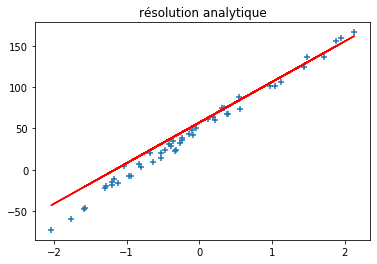

y = 49.28x + 57.29


In [35]:
co_xy = np.cov(x.T,y.T)[0,1]
print("covarience de x et y = ",co_xy)
x_bar = (sum(x)/len(x))[0]
print("~x = ", x_bar)
y_bar=(sum(y)/len(y))
print("~y = ",y_bar)
w_1= (co_xy/np.var(x,axis=0))[0]
print("W_1 = ", w_1)
w_0 = y_bar - w_1*x_bar
print("w_0 = ", w_0)
plt.scatter(x,y,marker='+')
plt.plot(x,w_0*x+w_1, 'r-')
plt.title("résolution analytique")
plt.show()
print("y = {:.2f}x + {:.2f}".format(w_0, w_1))

## 2.3 - Résolution avec scikit-learn

La bibliothèque `scikit-learn` permet de résoudre directement un problème de régression linéaire en utilisant la classe `LinearRegression` ( https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html ). À l'aide de la documentation, résolvez le problème de régression précédent. Attention aux dimensions des entrées de la fonction `fit`.

w0= 49.09744486934601
w1= 56.14879114381713


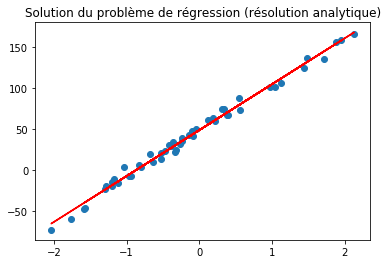

y = 49.10x + 56.15


In [36]:
model = sklearn.linear_model.LinearRegression().fit(x, y) 

r_sq = model.score(x, y)

w0 = model.intercept_
w1 = model.coef_[0]
print('w0=', w0)

print('w1=', w1)
# Affichage
plt.scatter(x, y)
plt.plot(x, w1*x+w0, 'r-')
plt.title("Solution du problème de régression (résolution analytique)")
plt.show()

print("y = {:.2f}x + {:.2f}".format(w0, w1))

Les résultats entre les deux méthodes de résolution sont-ils comparables ? 

## 2.4 - Prédire de nouvelles valeurs

Prédisez les valeurs régressées pour 100 points dans un intervalle compris entre min(x) et max(x).  Utilisez la formule d'une droite avec les paramètres trouvés aux questions précédentes puis utilisez la fonction `predict` du régresseur `scikit-learn`.

In [37]:
tab = np.linspace(0, 100, 100)
t = w1*tab + w0
print(t)

[  49.09744487  105.81339552  162.52934617  219.24529682  275.96124747
  332.67719812  389.39314877  446.10909942  502.82505007  559.54100072
  616.25695137  672.97290202  729.68885267  786.40480332  843.12075397
  899.83670462  956.55265527 1013.26860592 1069.98455658 1126.70050723
 1183.41645788 1240.13240853 1296.84835918 1353.56430983 1410.28026048
 1466.99621113 1523.71216178 1580.42811243 1637.14406308 1693.86001373
 1750.57596438 1807.29191503 1864.00786568 1920.72381633 1977.43976698
 2034.15571763 2090.87166828 2147.58761893 2204.30356958 2261.01952023
 2317.73547088 2374.45142153 2431.16737218 2487.88332283 2544.59927348
 2601.31522413 2658.03117478 2714.74712543 2771.46307608 2828.17902674
 2884.89497739 2941.61092804 2998.32687869 3055.04282934 3111.75877999
 3168.47473064 3225.19068129 3281.90663194 3338.62258259 3395.33853324
 3452.05448389 3508.77043454 3565.48638519 3622.20233584 3678.91828649
 3735.63423714 3792.35018779 3849.06613844 3905.78208909 3962.49803974
 4019.

Les résultats obtenus vous semble-t-il satisfaisant  ? 

In [38]:
tab = np.arange(0,101).reshape((101,1))
y_pred = model.predict(tab)
print('Predicted response:', y_pred, sep='\n')
#Oui les résultats obtenus sont satisfaisant 

Predicted response:
[  49.09744487  105.24623601  161.39502716  217.5438183   273.69260944
  329.84140059  385.99019173  442.13898288  498.28777402  554.43656516
  610.58535631  666.73414745  722.8829386   779.03172974  835.18052088
  891.32931203  947.47810317 1003.62689431 1059.77568546 1115.9244766
 1172.07326775 1228.22205889 1284.37085003 1340.51964118 1396.66843232
 1452.81722346 1508.96601461 1565.11480575 1621.2635969  1677.41238804
 1733.56117918 1789.70997033 1845.85876147 1902.00755262 1958.15634376
 2014.3051349  2070.45392605 2126.60271719 2182.75150833 2238.90029948
 2295.04909062 2351.19788177 2407.34667291 2463.49546405 2519.6442552
 2575.79304634 2631.94183748 2688.09062863 2744.23941977 2800.38821092
 2856.53700206 2912.6857932  2968.83458435 3024.98337549 3081.13216664
 3137.28095778 3193.42974892 3249.57854007 3305.72733121 3361.87612235
 3418.0249135  3474.17370464 3530.32249579 3586.47128693 3642.62007807
 3698.76886922 3754.91766036 3811.06645151 3867.21524265 39

Est-il pertinent de chercher à effectuer une régression linéaire régularisée sur ce jeu de données (type
LASSO ou Ridge) ? Expliquez pourquoi.

## 2.5 - Résolution avec une descente de gradient (numpy)

Nous allons dans cette partie coder directement un régresseur à l'aide de numpy sans utiliser la librairie scikit-learn en utilisant la méthode de descente de gradient.

Commencez par définir une fonction `eval_regresseur` permettant de calcul la sortie du régresseur à partir des paramètres (w,b) appris.

In [39]:
def eval_regresseur(x,w,b):
    return x.dot(w)+b

Écrivez une fonction `get_loss` permettant de calculer la fonction de coût optimisée durant l'apprentissage du régresseur.


In [40]:
def get_loss(x, y, w, b):
    """
    Calcule la fonction de coût (erreur quadratique moyenne) pour un ensemble d'exemples x et y avec les paramètres w et b.
    """
    y_pred = eval_regresseur(x, w, b)
    loss = np.mean((y_pred - y)**2)
    return loss


Écrivez une fonction `get_grad_loss` permettant de calculer le gradient de la fonction de coût optimisée durant l'apprentissage du régresseur. Cette fonction retourne deux valeurs correspondant à la dérivée de la fonction de coût par rapport à $b$ et la dérivée de la fonction de coût par rapport à $w$.

In [41]:
def get_grad_loss(x, y, w, b):
    """
    Calcule les gradients de la fonction de coût par rapport aux paramètres w et b pour un ensemble d'exemples x et y.
    """
    y_pred = eval_regresseur(x, w, b)
    dw = np.dot(x.T, (y_pred - y)) / x.shape[0]
    db = np.mean(y_pred - y)
    return dw, db


Écrivez une fonction `train_regresseur` permettant de faire l'apprentissage d'un régresseur. Pour réaliser cette fonction, vous initialiserez les paramètres $w$ et $b$ définissant la droite au hasard. Vous utiliserez ensuite un algorithme de descente de gradient pour mettre à jours ces paramètres. Vous pouvez utiliser une boucle `for` pour cette question.

In [42]:
import numpy as np

def train_regresseur(x, y, t, N_max):
    '''
    :param x: exemples d'apprentissage
    :param y: labels des exemples d'apprentissage
    :param t: taux d'apprentissage / learning rate
    :param N_max: nombre maximale d'itération de l'algorithme
    :return: les paramètres décrivant la droite apprise (w, b), ainsi que l'évolution de la fonction de coût
    '''

    # Initialisation aléatoire de w et b
    w = np.random.randn(x.shape[1], 1)
    b = np.random.randn()

    # Initialisation de la liste des coûts
    cost_list = []

    # Itération de l'algorithme de descente de gradient
    for i in range(N_max):
        # Calcul de la prédiction
        y_pred = eval_regresseur(x, w, b)

        # Calcul du gradient pour les paramètres w et b
        dw = (1/x.shape[0]) * np.dot(x.T, (y_pred - y))
        db = (1/x.shape[0]) * np.sum(y_pred - y)

        # Mise à jour des paramètres w et b
        w = w - t*dw
        b = b - t*db

        # Calcul du coût pour les paramètres actuels w et b
        cost = get_loss(x, y, w, b)

        # Ajout du coût dans la liste des coûts
        cost_list.append(cost)

    # Retour des paramètres w et b, ainsi que la liste des coûts
    return w, b, cost_list


Visualisez l'évolution de la fonction de coût durant l'apprentissage. Est-elle bien décroissante ? 

In [43]:
w, b, loss = train_regresseur(x, y, t, 10)

plt.plot(range(len(loss)), loss)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Evolution de la fonction de coût durant l\'apprentissage')
plt.show()

ValueError: operands could not be broadcast together with shapes (100,) (1,50) 

Visualisez la droite apprise par votre régresseur. Est-elle correcte ?

In [ ]:
# Fonction de coût
def error(m, b, X, Y):
    return sum(((m * x + b) - Y[idx])**2 for idx, x in enumerate(X)) / float(len(X))

# Gradient du paramètre m
def m_grad(m, b, X, Y):
    return sum(-2 * x * (Y[idx] - (m * x + b)) for idx, x in enumerate(X)) / float(len(X))

# Gradient du paramètre b
def b_grad(m, b, X, Y):
    return sum(-2 * (Y[idx] - (m * x + b)) for idx, x in enumerate(X)) / float(len(X))

def gradient_descent_LR(X, Y, epochs, lr):
    assert(len(X) == len(Y))
    m = 0
    b = 0
    for e in range(epochs):
        m = m - lr * m_grad(m, b, X, Y)
        b = b - lr * b_grad(m, b, X, Y)
    return m, b

# Génération du jeu de données
X = np.linspace(-1, 1, 100) + np.random.normal(0, 0.25, 100)
Y = np.linspace(-1, 1, 100) + np.random.normal(0, 0.25, 100)
# Exécution de l'algorithme
m, b = gradient_descent_LR(X, Y, epochs=10000, lr=0.001)
# Visualisation de la droite avec les valeurs de m et b trouvées par descente de gradient
line_x = [min(X), max(X)]
line_y = [(m * i) + b for i in line_x]
plt.plot(line_x, line_y, 'b')
plt.plot(X, Y, 'ro')
plt.show()

# 3 - Régression polynomiale

Exécutez le code suivant pour générer un nouveau problème de régression

In [ ]:
d = data.make_regression(
    n_samples = 30,
    n_features = 1,
    n_informative = 1,
    n_targets = 2,
    noise = 10
)

x = d[0]
y = np.array((d[1][:,0]**2+0.3*d[1][:,1])[:,None])
y = y/max(y)

Affichez les données générées.

In [ ]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Problème de régression 2")
plt.show()

A votre avis quel devrait être le degré d'un polynôme résolvant ce problème de régression ?

## 3.1 Résolution analytique

En utilisant l'astuce vue en cours pour effectuer une régression polynomiale, faites la résolution analytique de ce problème de régression.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

d = make_regression(n_samples=30, n_features=1, n_informative=1, n_targets=2, noise=10)
x = d[0]
y = np.array((d[1][:,0]**2+0.3*d[1][:,1])[:,None])
y = y/max(y)

# Ajout de features polynomiales
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)

# Entraînement du modèle
reg = LinearRegression().fit(x_poly, y)

# Prédiction
x_new = np.linspace(np.min(x), np.max(x), 100).reshape(-1, 1)
x_new_poly = poly.transform(x_new)
y_pred = reg.predict(x_new_poly)

# Affichage des données et des prédictions
plt.scatter(x, y, color='blue')
plt.plot(x_new, y_pred, color='red', label='Polynomial Regression')
plt.legend()
plt.show()

## 3.2 Résolution avec scikit-learn

En utilisant la même astuce, résolvez ce problème de régression polynomial avec le régresseur linéaire de scikit-learn.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

d = make_regression(n_samples=30, n_features=1, n_informative=1, n_targets=2, noise=10)
x = d[0]
y = np.array((d[1][:,0]**2+0.3*d[1][:,1])[:,None])
y = y/max(y)

# Ajout de features polynomiales
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)

# Entraînement du modèle
reg = LinearRegression().fit(x_poly, y)

# Prédiction
x_new = np.linspace(np.min(x), np.max(x), 100).reshape(-1, 1)
x_new_poly = poly.transform(x_new)
y_pred = reg.predict(x_new_poly)

# Affichage des données et des prédictions
plt.scatter(x, y, color='blue')
plt.plot(x_new, y_pred, 'c--', label='Polynomial Regression')
plt.legend()
plt.show()

Que pouvez-vous dire des résultats ? Faites varier le degré maximal du polynôme ainsi que le poids du
facteur de régularisation. Tracez les courbes correspondantes et étudiez les valeurs des coefficients des
polynômes trouvés. Faites une analyse des résultats.

In [ ]:
d = make_regression(n_samples=30, n_features=1, n_informative=1, n_targets=2, noise=10)
x = d[0]
y = np.array((d[1][:,0]**2+0.3*d[1][:,1])[:,None])
y = y/max(y)

color = ["red","blue","green","cyan","magenta","yellow","black","brown","orange","purple","pink","grey","teal"]

plt.figure(figsize=(10,8))

for i in range(1,13):
    # Ajout de features polynomiales
    poly = PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(x)

    # Entraînement du modèle
    reg = LinearRegression().fit(x_poly, y)

    # Prédiction
    x_new = np.linspace(np.min(x), np.max(x), 100).reshape(-1, 1)
    x_new_poly = poly.transform(x_new)
    y_pred = reg.predict(x_new_poly)

    # Affichage des données et des prédictions
    plt.scatter(x, y, color='blue')
    plt.plot(x_new, y_pred, color=color[i], linestyle="--", label='Polynomial Regression {}'.format(i))


plt.legend()
plt.show()

Testez également les modèles `linear_model.Ridge` et `linear_model.Lasso` à la place de linear model.LinearRegression
. Que pouvez-vous dire des résultats ? Faites varier le degré maximal du polynôme ainsi que le poids du
facteur de régularisation.

In [ ]:
from sklearn.linear_model import Ridge

d = make_regression(n_samples=30, n_features=1, n_informative=1, n_targets=2, noise=10)
x = d[0]
y = np.array((d[1][:,0]**2+0.3*d[1][:,1])[:,None])
y = y/max(y)

color = ["red","blue","green","cyan","magenta","yellow","black","brown","orange","purple","pink","grey","teal"]

plt.figure(figsize=(10,8))

for i in range(1,13):
    # Ajout de features polynomiales
    poly = PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(x)

    # Entraînement du modèle
    ridge = Ridge()
    reg = ridge.fit(x_poly, y)

    # Prédiction
    x_new = np.linspace(np.min(x), np.max(x), 100).reshape(-1, 1)
    x_new_poly = poly.transform(x_new)
    y_pred = ridge.predict(x_new_poly)

    # Affichage des données et des prédictions
    plt.scatter(x, y, color='blue')
    plt.plot(x_new, y_pred, color=color[i], linestyle="--", label='Polynomial Regression {}'.format(i))

plt.title("Ridge regression")
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import Lasso

d = make_regression(n_samples=30, n_features=1, n_informative=1, n_targets=2, noise=10)
x = d[0]
y = np.array((d[1][:,0]**2+0.3*d[1][:,1])[:,None])
y = y/max(y)

color = ["red","blue","green","cyan","magenta","yellow","black","brown","orange","purple","pink","grey","teal"]

plt.figure(figsize=(10,8))

for i in range(1,13):
    # Ajout de features polynomiales
    poly = PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(x)

    # Entraînement du modèle
    
    lasso = Lasso()
    reg = lasso.fit(x_poly, y)
    
    # Prédiction
    x_new = np.linspace(np.min(x), np.max(x), 100).reshape(-1, 1)
    x_new_poly = poly.transform(x_new)
    
    y_pred = lasso.predict(x_new_poly)

    # Affichage des données et des prédictions
    plt.scatter(x, y, color='blue')
    plt.plot(x_new, y_pred, color=color[i], linestyle="--", label='Polynomial Regression {}'.format(i))

plt.title("Lasso regression")
plt.legend()
plt.show()

La documentation de scikit-learn propose une autre fonction pour la régression LASSO : linear model.LassoLars ( https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLars.html ).
Quelle est la différence avec la précédente ? Testez cette fonction pour ce problème de régression.

In [ ]:
from sklearn.linear_model import LassoLars

d = make_regression(n_samples=30, n_features=1, n_informative=1, n_targets=2, noise=10)
x = d[0]
y = np.array((d[1][:,0]**2+0.3*d[1][:,1])[:,None])
y = y/max(y)

color = ["red","blue","green","cyan","magenta","yellow","black","brown","orange","purple","pink","grey","teal"]

plt.figure(figsize=(10,8))

for i in range(1,13):
    # Ajout de features polynomiales
    poly = PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(x)

    # Entraînement du modèle
    
    lasso_lars = LassoLars()
    lasso_lars.fit(x_poly, y)
    
    # Prédiction
    x_new = np.linspace(np.min(x), np.max(x), 100).reshape(-1, 1)
    x_new_poly = poly.transform(x_new)
    
    y_pred = lasso_lars.predict(x_new_poly)

    # Affichage des données et des prédictions
    plt.scatter(x, y, color='blue')
    plt.plot(x_new, y_pred, color=color[i], linestyle="--", label='Polynomial Regression {}'.format(i))

plt.title("LassoLars regression")
plt.legend()
plt.show()

## 3.3 - Résolution avec une descente de gradient (numpy)

Nous allons dans cette partie coder directement un régresseur à l'aide de numpy sans utiliser la librairie scikit-learn en utilisant la méthode de descente de gradient.

Commencez par définir une fonction `eval_regresseur` permettant de calcul la sortie du régresseur à partir des poids appris (W). On utilisera l'astuce vue en cour pour intégrer le biais à $W$.

In [ ]:
def eval_regresseur(X,W):
    return np.dot(X,W)

Écrivez une fonction `get_loss` permettant de calculer la fonction de coût optimisée durant l'apprentissage du régresseur.


In [ ]:
def get_loss(X,y,W):
    return np.mean((y - eval_regresseur(X,W))**2)

Écrivez une fonction `get_grad_loss` permettant de calculer le gradient de la fonction de coût optimisée durant l'apprentissage du régresseur. Cette fonction retourne une valeur correspondant au gradient de la fonction de coût par rapport W.

In [ ]:
def get_grad_loss(X,y,W):
    return -2*np.dot(X.T, y-eval_regresseur(X,W))/X.shape[0]

Écrivez une fonction `train_regresseur` permettant de faire l'apprentissage d'un régresseur. Pour réaliser cette fonction, vous initialiserez les paramètres $W$ et $b$ définissant la droite au hasard. Vous utiliserez ensuite un algorithme de descente de gradient pour mettre à jours ces paramètres. Vous pouvez utiliser une boucle `for` pour cette question.

In [ ]:
def train_regresseur(X,y,t,N_max):
    '''
    :param X: exemples d'apprentissage (la première colonne doit contenir que des 1).
    :param y: labels des exemples d'apprentissage
    :param t: taux d'apprentissage / learning rate
    :param N_max: nombre maximale d'itération de l'algorithme
    :return : les paramètres décrivant la droite apprise
    '''
    y = y[:,None]
    # Initialisation aléatoire de w et b
    W = np.random.rand(X.shape[1],1)
    loss = []
    for n in range(N_max):
        # Mise à jours de w,b par descente de gradient
        grad = get_grad_loss(X,y,W)
        W = W - t*grad
        loss.append(get_loss(X,y,W))
    return W,np.array(loss)

Visualisez la solution trouvée. 

In [ ]:
# Générer des données d'entraînement aléatoires
X = np.random.rand(100, 2)
X[:,0] = 1
y = 2 + 3*X[:,1] + np.random.randn(100)

# Paramètres de l'algorithme de descente de gradient
t = 0.01
N_max = 1000

# Entraîner le régresseur
W,loss = train_regresseur(X,y,t,N_max)

# Tracer les exemples d'apprentissage
plt.scatter(X[:,1],y)

# Tracer la droite de régression
x = np.linspace(X[:,1].min(), X[:,1].max(), 100)
y = W[0] + W[1]*x

plt.plot(x, y, '-r', label='y=w0+w1*x')
plt.legend(loc='best')
plt.show()